<a href="https://colab.research.google.com/github/SnaraC/Machine-Learning-Research-Project/blob/main/Capstone_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Import the data

#data = pd.read_excel('/content/sample_data/Dataset_A_dataset.xlsx')
#data = pd.read_excel('/content/sample_data/updatedData.xlsx')
#data = pd.read_csv('/content/sample_data/Dataset_B_dataset.csv')

# Remove missing data

data.dropna(axis=0, inplace=True)
#print(column)

In [ ]:
#Choose the target output

#x = data.drop(['PHQ', 'Y1MED1FF'], axis=1)
#y = data['Y1MED1FF']

#x = data.drop(['PHQ', 'Y1MED1FF'], axis=1)
#y = data['PHQ']

#x = data.drop(['target', 'ID'], axis=1)
#y = data['target']

      RIDAGEYR  RIDRETH3  RIAGENDR  DMDMARTZ  DMDEDUC2  INDFMPIR  HIQ011  \
0           68         7         1       3.0       4.0      1.20     1.0   
1           76         3         1       1.0       5.0      3.61     1.0   
2           68         4         2       2.0       5.0      5.00     1.0   
5           62         4         2       2.0       3.0      0.07     1.0   
8           76         6         1       1.0       4.0      2.37     1.0   
...        ...       ...       ...       ...       ...       ...     ...   
9847        80         3         1       1.0       4.0      1.02     1.0   
9848        45         3         2       2.0       4.0      3.51     1.0   
9849        53         3         2       1.0       2.0      3.13     1.0   
9852        80         3         1       1.0       3.0      4.08     1.0   
9853        60         3         1       3.0       5.0      5.00     1.0   

      HIQ210  SMQ020  PAD680  ...  LBXHCT  URXUMS  LBDSALSI  LBDMONO  \
0        2.0   

In [ ]:
#Oversampling balancing technique
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(x, y)

#Random Undersampling balancing technique
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(x, y)

#Train and Test
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Accuracy score:  0.7366548042704626
F1 score:  0.7516778523489933


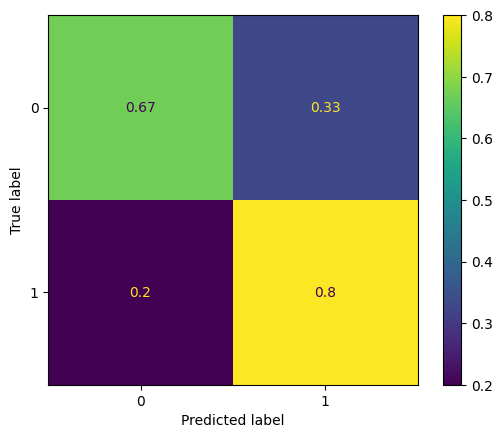

Text(0.5, 1.0, 'Supported Vector Machine')

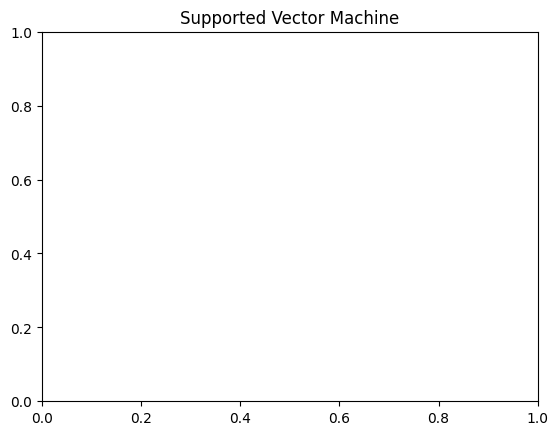

In [ ]:
# Apply the model Support vector classification
clf = svm.SVC()

# Scale the data
clf = make_pipeline(StandardScaler(), clf)

clf.fit(x_train,y_train)

# Predict the x data
y_pred = clf.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))

# Check the f1 score to measures a model's accuracy
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

percentage_cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

disp = ConfusionMatrixDisplay(percentage_cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()
plt.title('Supported Vector Machine')